# Customer Churn Analysis

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import cufflinks as cf  # Cufflinks is used to show the plotly plot in the Jupyter notebook
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# To show the plotly plot in the Jupyter notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

# Initialize plotly notebook mode
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [ ]:
df=pd.read_csv('/content/CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataframe Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


> SeniorCitizen is a categorical Value, so it should not be treated as Numerical value

> Total charges is treated as object, It should also be considered as float

> Since Mean and Median are so close to each other ,there may not be a many outliers

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


>1869/7043 Peoples are found to be Churners i.e 26.53% Churners



<function matplotlib.pyplot.show(close=None, block=None)>

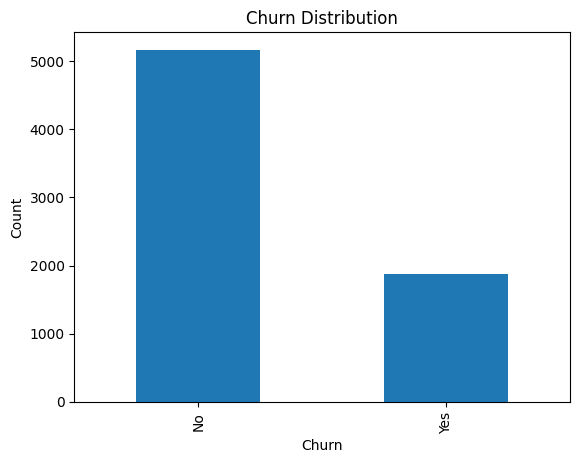

In [ ]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show

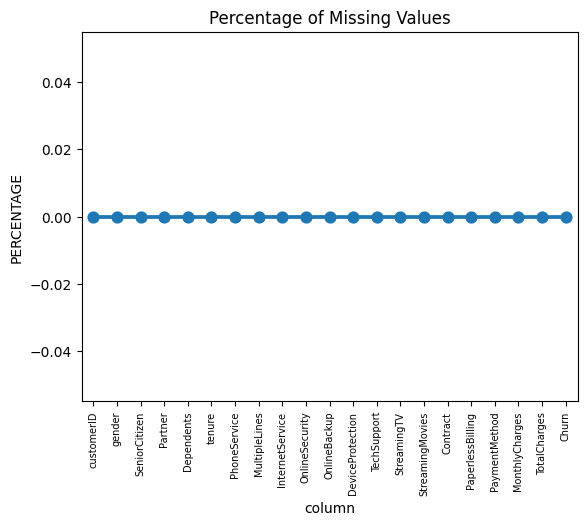

In [ ]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'percentage']

# Plot the missing values
ax = sns.pointplot(x='column', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

> Converting Total charges to Numerical data type

In [ ]:
ndf=df.copy()

In [ ]:
ndf['TotalCharges'] = pd.to_numeric(ndf['TotalCharges'],
                                    errors='coerce'#To avoid error
                                    )

ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> Total charges have 7032 Non Null value
Therefore 11 Null values occured

11/7043 ie 0.156% of NULL data only

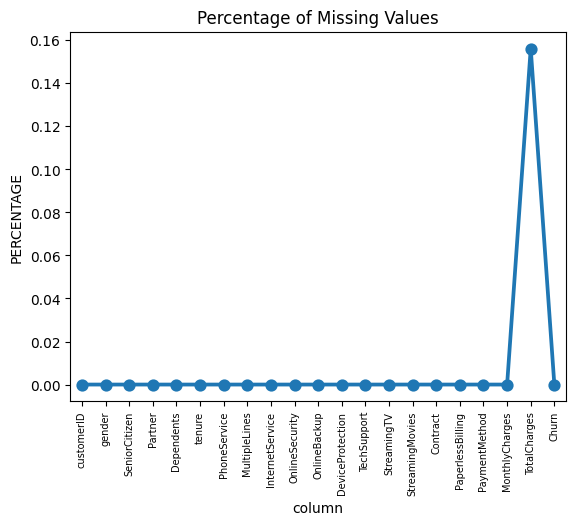

In [ ]:
missing = pd.DataFrame((ndf.isnull().sum()) * 100 / ndf.shape[0]).reset_index()
missing.columns = ['column', 'percentage']

# Plot the missing values
ax = sns.pointplot(x='column', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

0.156% data wont matter much
so instead of filling data using pre existing methods
we shall delete them


In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
ndf.dropna(subset=['TotalCharges'],inplace=True)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Performing Feature Binning on Tenure

In [ ]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

# Perform feature binning
ndf['tenure_binned'] = pd.cut(ndf['tenure'], bins=bins, labels=labels, right=True)

ndf.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_binned
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [ ]:
ndf['tenure_binned'].value_counts()

,count
tenure_binned,
1-12,2175
61-72,1407
13-24,1024
25-36,832
49-60,832
37-48,762


In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

## Dropping Columns

In [ ]:
ndf.drop(columns=['customerID','tenure'],inplace=True,axis=1)
ndf.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_binned
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Data Exploration

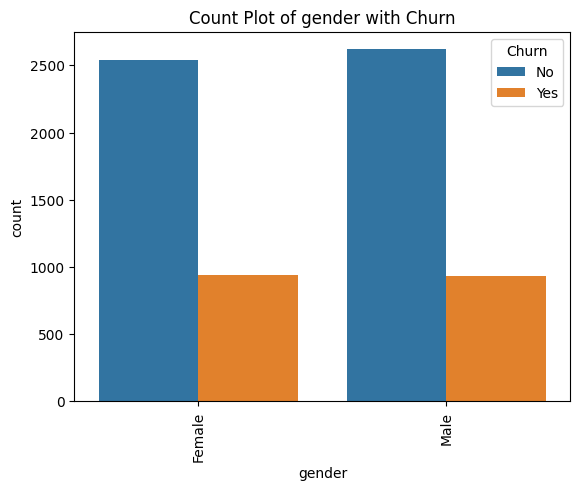

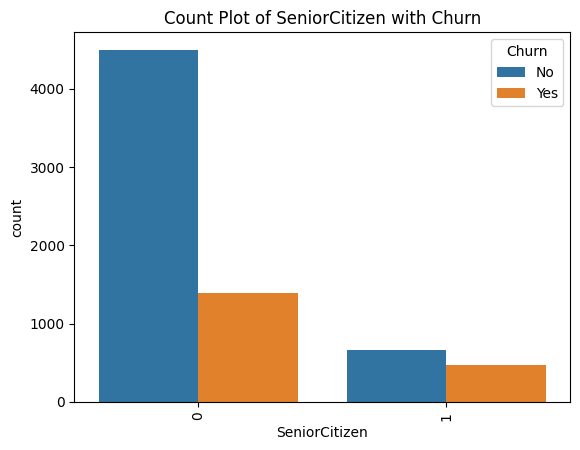

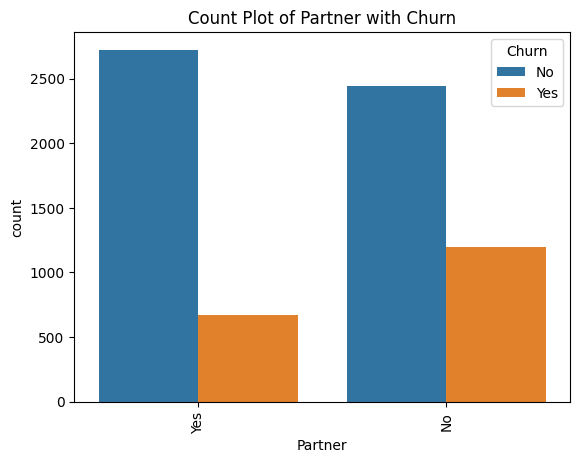

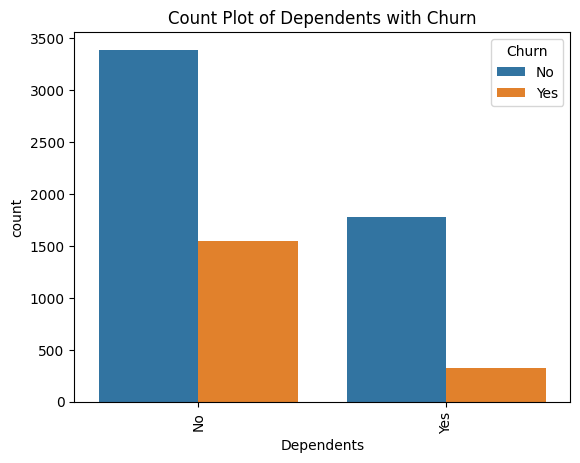

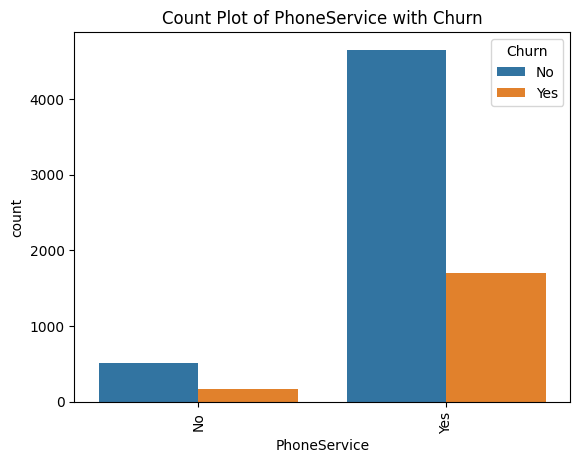

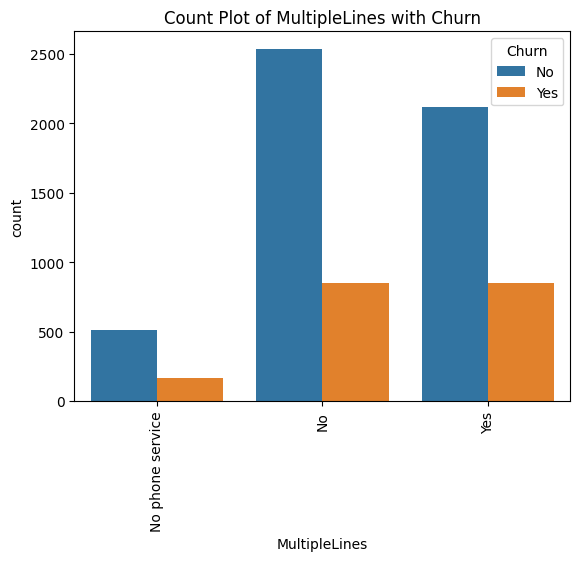

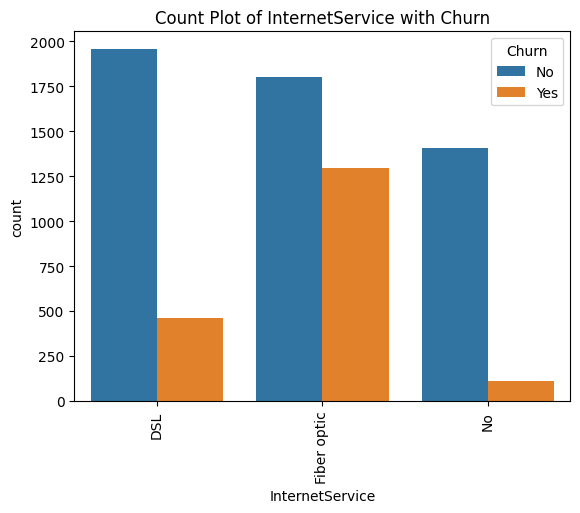

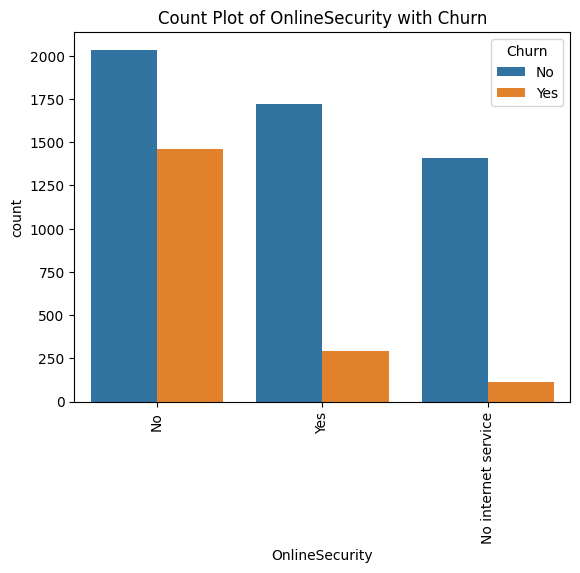

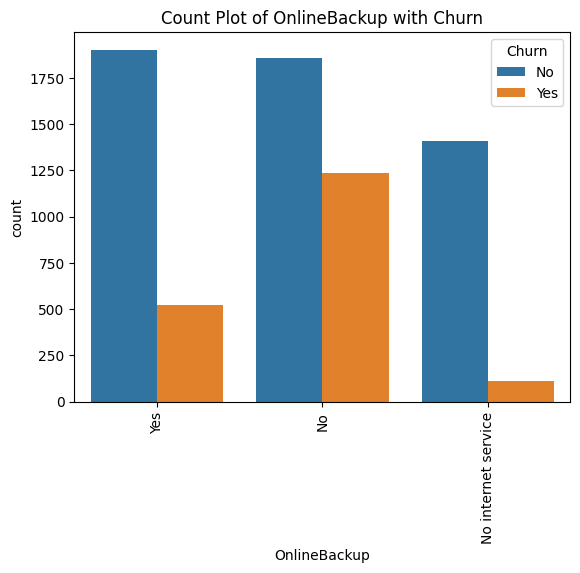

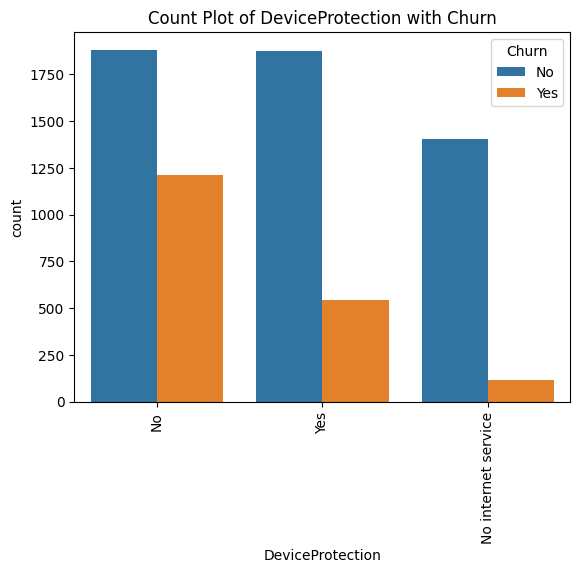

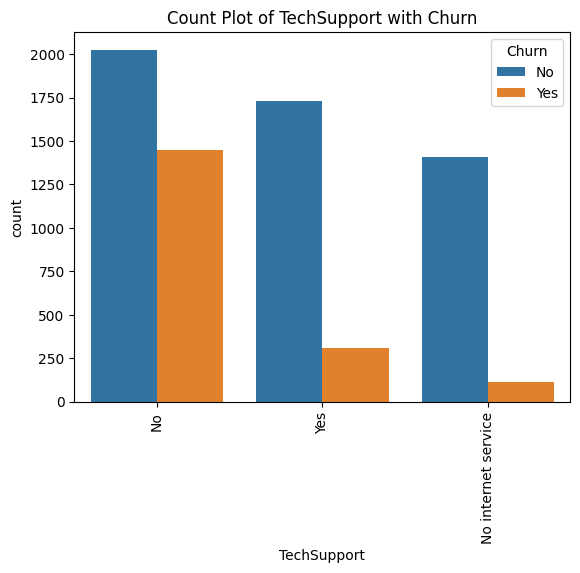

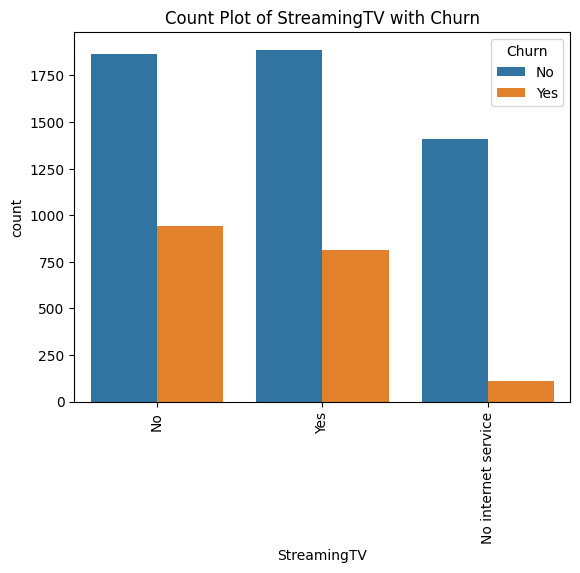

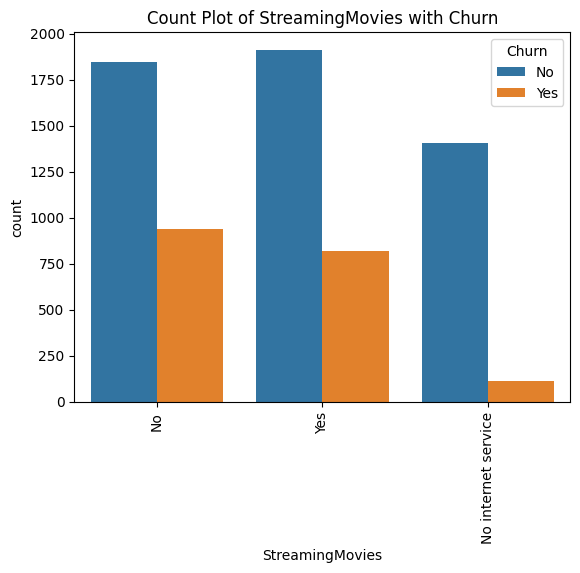

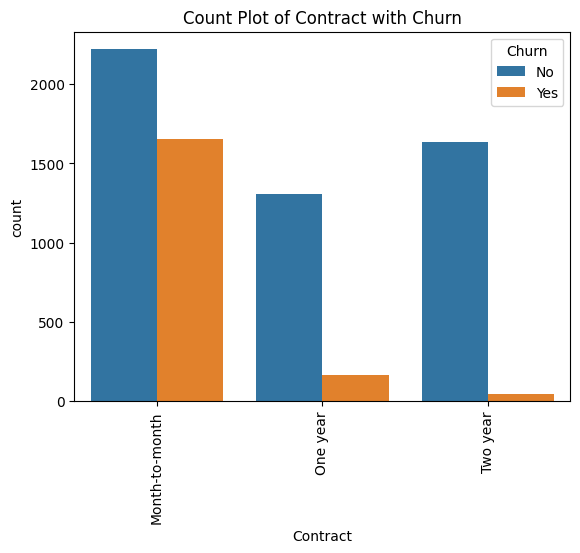

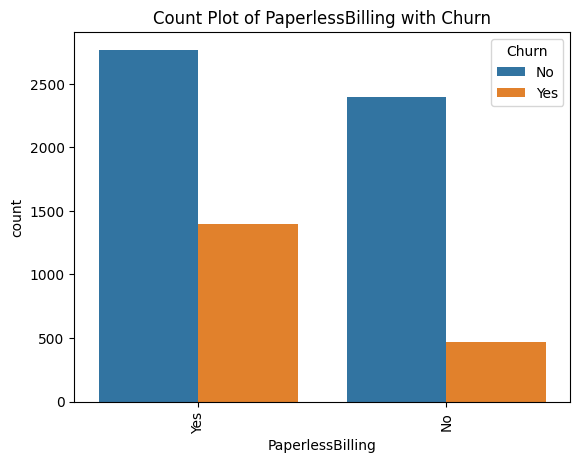

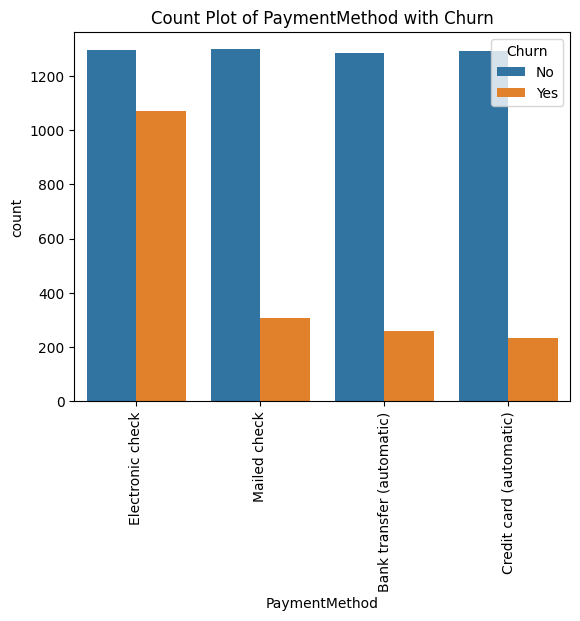

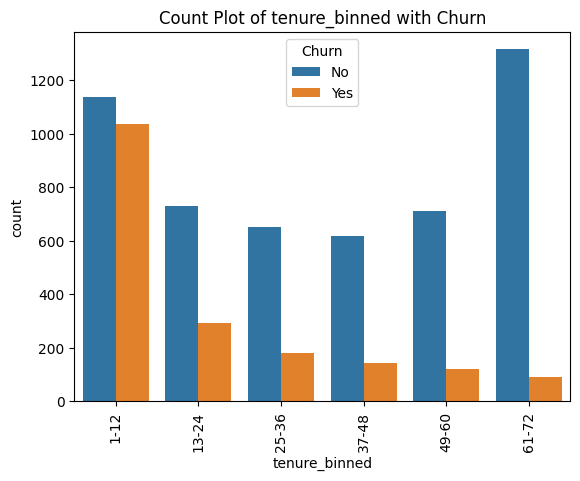

In [ ]:
nodf=ndf.drop(columns=['Churn','MonthlyCharges','TotalCharges'])
for i in nodf.columns:
  plt.figure()
  sns.countplot(data=ndf,x=i,hue='Churn')
  plt.title(f'Count Plot of {i} with Churn')
  plt.xticks(rotation=90)


## Univariate Analysis

- Both Male and Female are equally likely to churn
- Senior citizens are more likely to Churn
- Non Partners are highly likely to Churn
- People with tenure 1-12months are highly likely to churn
-People paying via Eletronic Cheques are highly likely to churn
- People with Paperless Billing are highly likely to churn
- People with month to month contract are highly likely to churn
- People having internet services are more likely to churn
- People with
  - No Tech Support  
  - No device protection
  - No online Backup
  - No online Security
are likely to churn

## Feature Encoding

In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

In [ ]:
categorical_columns = ndf.select_dtypes(include=['object','category']).columns.tolist()
categorical_columns.remove('Churn')
df_encoded = pd.get_dummies(ndf, columns=categorical_columns)

label_encoder = LabelEncoder()
df_encoded['Churn'] = label_encoder.fit_transform(ndf['Churn'])

df_encoded.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_binned_1-12,tenure_binned_13-24,tenure_binned_25-36,tenure_binned_37-48,tenure_binned_49-60,tenure_binned_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


## Bivariate Analysis

In [ ]:
dfc=df_encoded[df_encoded['Churn']==True]
dfc.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_binned_1-12,tenure_binned_13-24,tenure_binned_25-36,tenure_binned_37-48,tenure_binned_49-60,tenure_binned_61-72
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
5,0,99.65,820.50,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
8,0,104.80,3046.05,1,True,False,False,True,True,False,...,False,False,True,False,False,False,True,False,False,False
13,0,103.70,5036.30,1,False,True,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
dfnc=df_encoded[df_encoded['Churn']==False]
dfnc.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_binned_1-12,tenure_binned_13-24,tenure_binned_25-36,tenure_binned_37-48,tenure_binned_49-60,tenure_binned_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
6,0,89.10,1949.40,0,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
7,0,29.75,301.90,0,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False


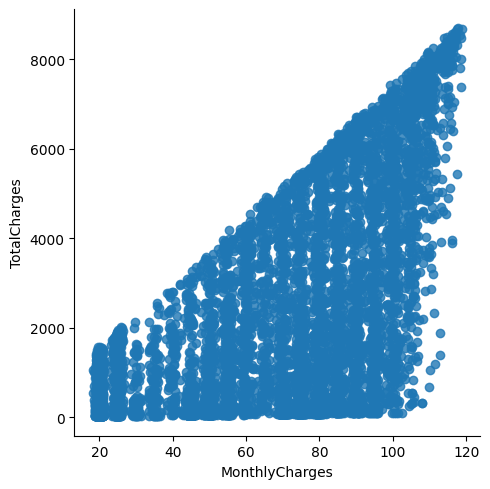

In [ ]:
sns.lmplot(data=ndf,x='MonthlyCharges',y='TotalCharges', fit_reg=False )


Monthly Charges and Total Charges are Positively correlated


In [ ]:
df_corr = df_encoded.corr()
df_corr

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_binned_1-12,tenure_binned_13-24,tenure_binned_25-36,tenure_binned_37-48,tenure_binned_49-60,tenure_binned_61-72
SeniorCitizen,1.000000,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219874,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.042410,0.030055,0.271117,-0.376568,-0.191881,-0.047220,0.009465,0.017614,0.070048,0.185440
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.150541,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.001819,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.001819,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,0.006249,-0.020658,-0.004319,0.016279
Partner_No,-0.016957,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.305061,0.048481,-0.003131,-0.035092,-0.105341,-0.280353
Partner_Yes,0.016957,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_No,0.210550,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.145379,0.001459,-0.009289,-0.023544,-0.031419,-0.118090
Dependents_Yes,-0.210550,-0.112343,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.052369,0.061134,-0.149274,0.056448,-0.145379,-0.001459,0.009289,0.023544,0.031419,0.118090


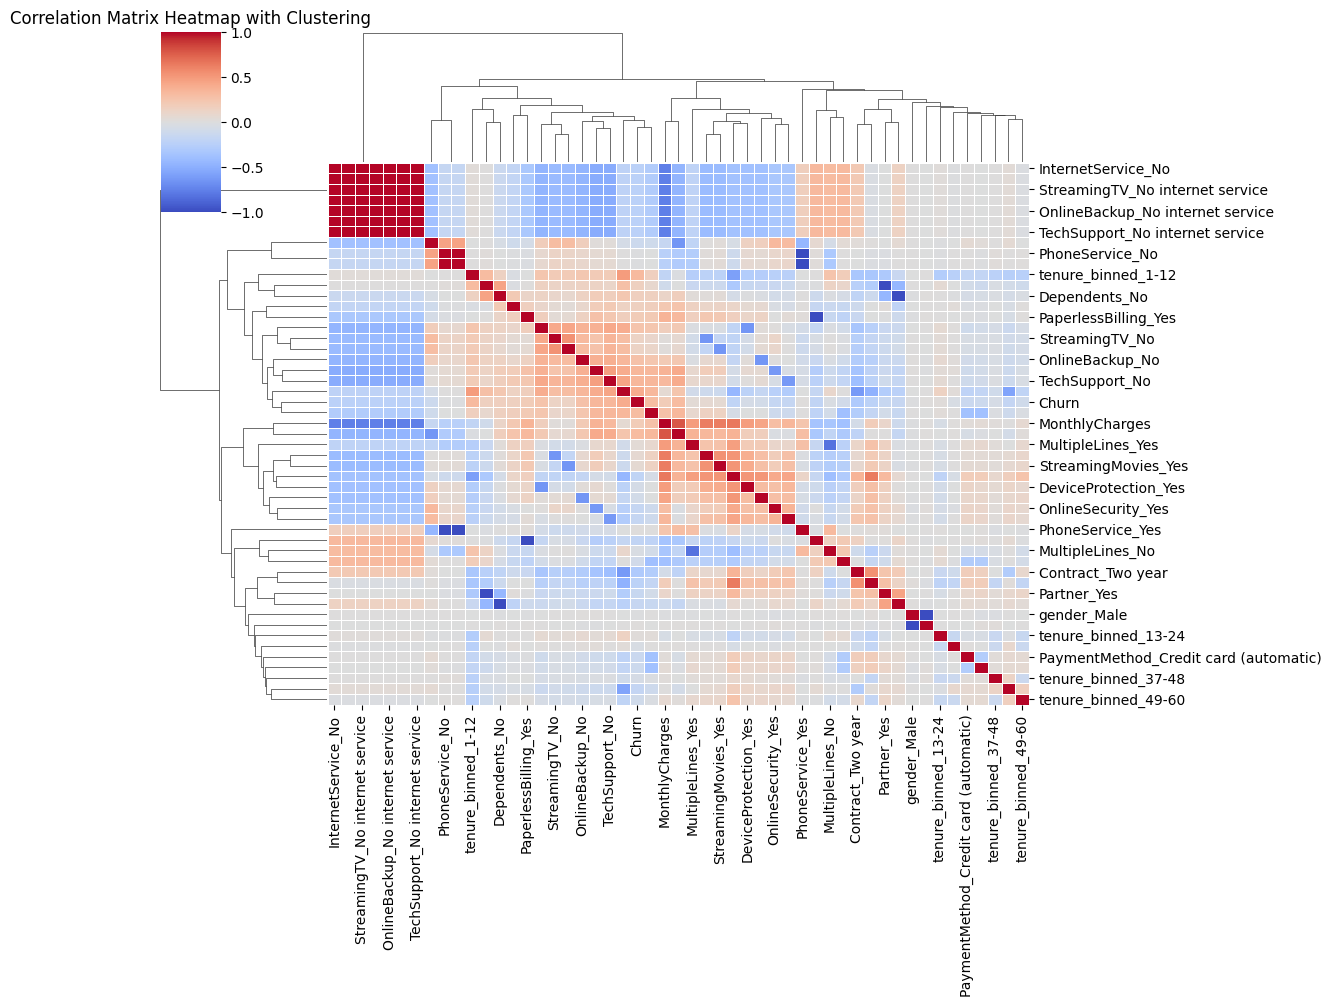

In [ ]:
sns.clustermap(df_corr, annot=False, cmap='coolwarm', linewidths=0.5, figsize=(12, 10))
plt.title('Correlation Matrix Heatmap with Clustering')
plt.show()

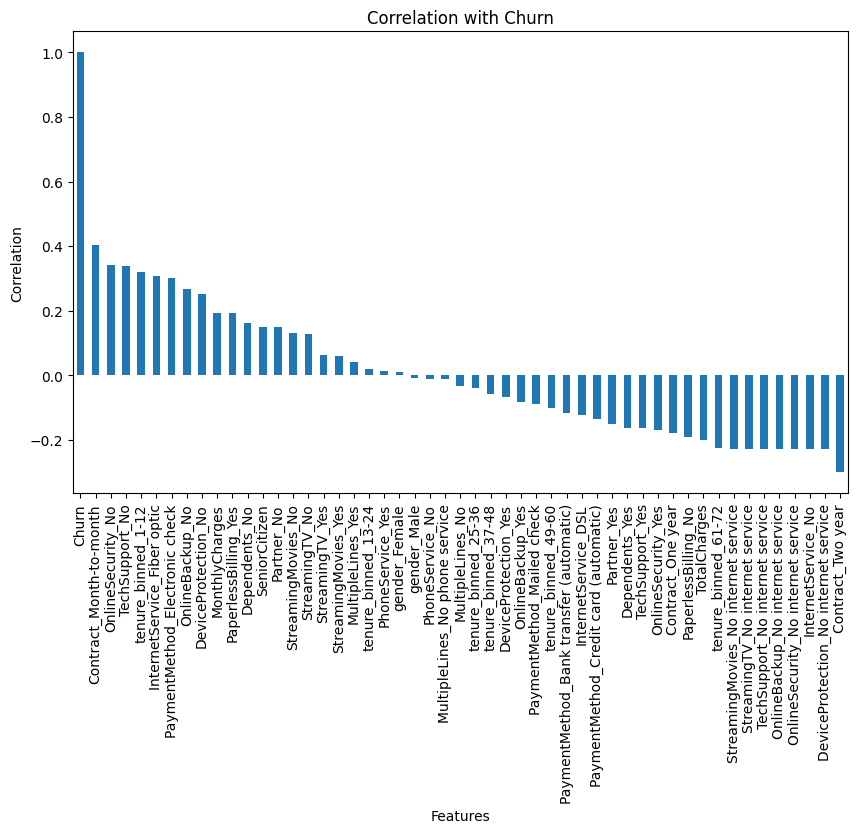

In [ ]:
plt.figure(figsize=(10, 6))
df_corr['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

One more Interactive way of doing it is to do it by kde plot

<ipython-input-52-c11c58b80d1d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-52-c11c58b80d1d>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




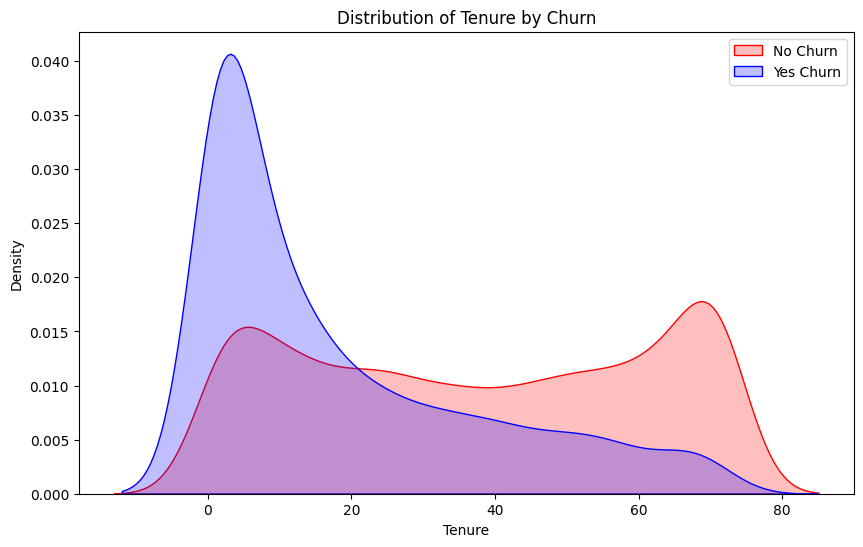

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['tenure'][df['Churn'] == 'No'], color='Red', shade=True, label='No Churn')
sns.kdeplot(df['tenure'][df['Churn'] == 'Yes'], color='Blue', shade=True, label='Yes Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('Distribution of Tenure by Churn')
plt.legend()
plt.show()

Analysis Function

In [ ]:
def uniplot(df, col, title, hue=None, log_scale=False):


    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    if hue:
        temp = df[hue]
        hue_values = len(temp.unique())
    else:
        temp = pd.Series()
        hue_values = 0

    # Dynamic figure size
    width = len(df[col].unique()) + 7 + 4 * hue_values
    fig, ax = plt.subplots()
    fig.set_size_inches(width, 8)

    # Plotting
    plt.xticks(rotation=45)
    if log_scale:
        plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    plt.show()


Function to be used for bivariate analysis

We will use churned dataframe

In [ ]:
dfnc = ndf[ndf['Churn'] == 'No']
print(dfnc.head())

dfc = ndf[ndf['Churn'] == 'Yes']
print(dfc.head())


   gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
6    Male              0      No        Yes          Yes               Yes   
7  Female              0      No         No           No  No phone service   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
3             DSL            Yes           No              Yes         Yes   
6     Fiber optic             No          Yes               No          No   
7             DSL            Yes           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling

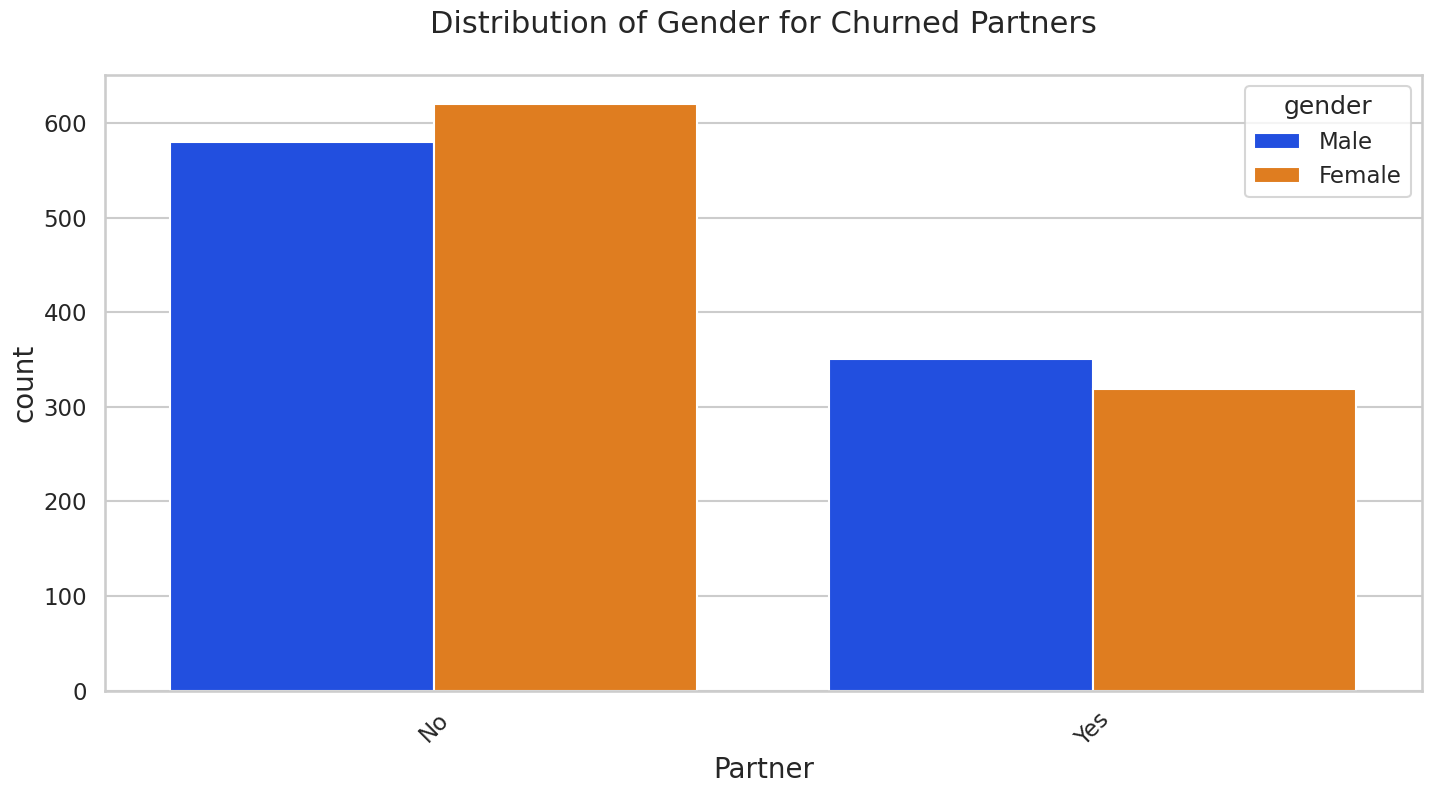

In [ ]:
uniplot(dfc,col='Partner',title='Distribution of Gender for Churned Partners',hue='gender')

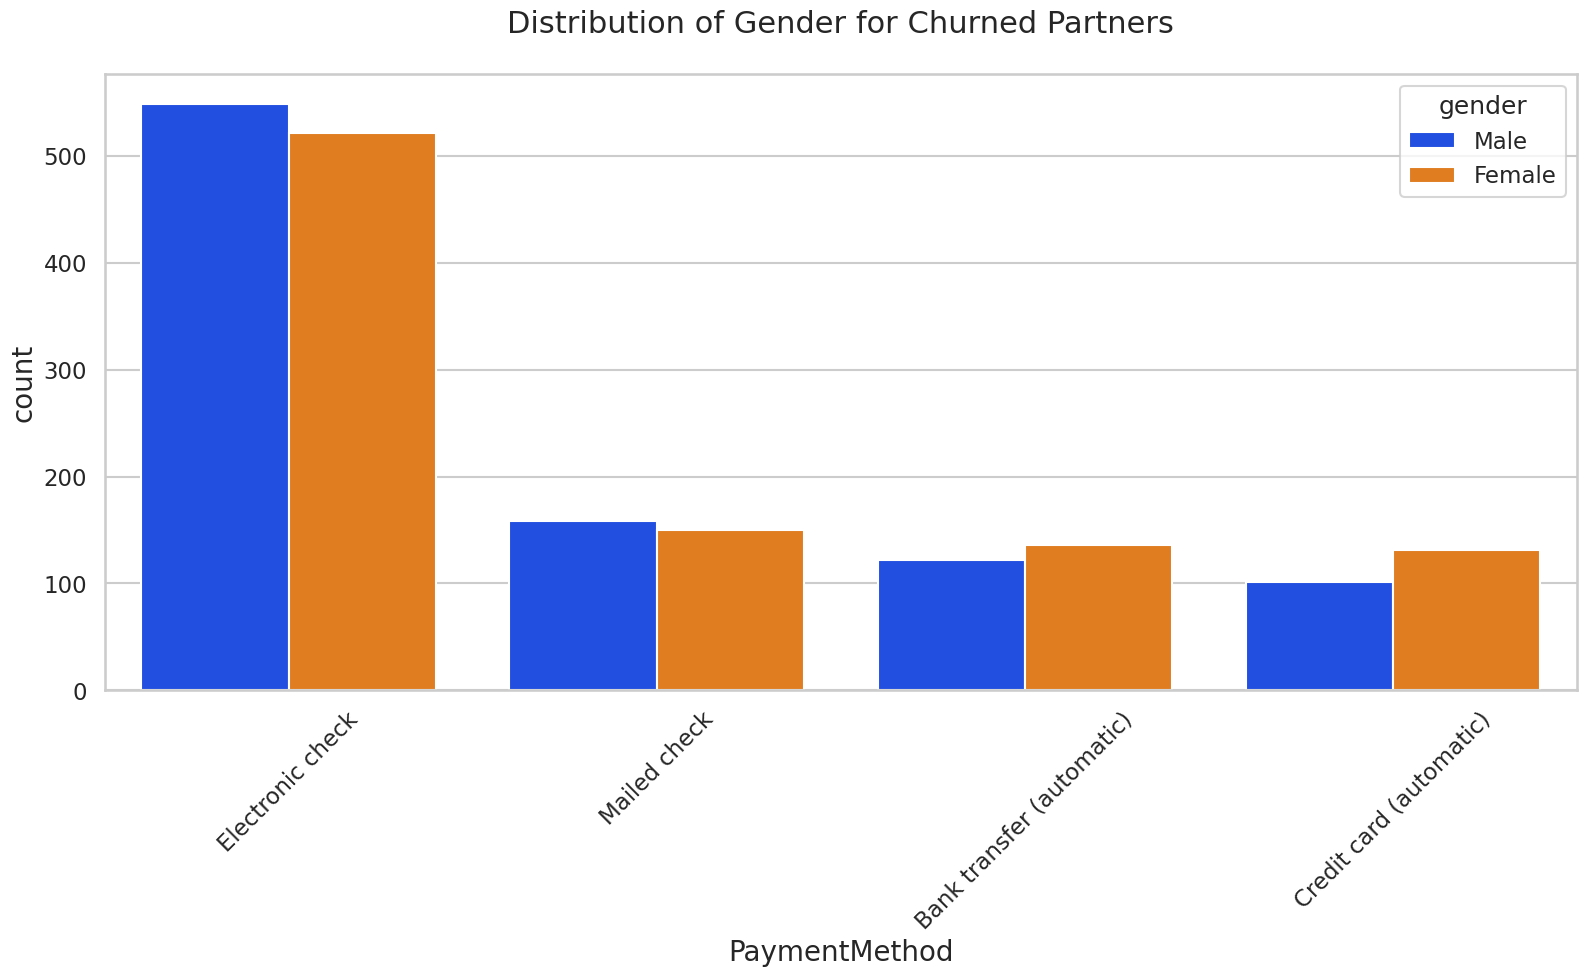

In [ ]:
uniplot(dfc,col='PaymentMethod',title='Distribution of Gender for Churned Partners',hue='gender')